In [59]:
import numpy as np
from scipy.linalg import sqrtm, eigh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Exercise. Compare isotropic model and anistropic model

Draw covariance contours

In [58]:
class Mysimulator: 
    def __init__(self,x_min=0, y_min=0, x_max=100, y_max=100, n=500,
                theta=3, range_val1=2, range_val2=4):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
        self.n = n
        self.theta = theta
        self.range_val1 = range_val1
        self.range_val2 = range_val2
    
    def generate_grid(self):
        x = np.linspace(self.x_min, self.x_max, self.n)
        y = np.linspace(self.y_min, self.y_max, self.n)
        X, Y = np.meshgrid(x,y)
        d1 = np.sqrt((x[0] - x)**2)
        d2 = np.sqrt((y[0] - y)**2)
        D1, D2 = np.meshgrid(d1, d2)

        return X,Y,D1,D2
    
    def gau_kernel(self, x, y, sx, sy):
        return np.exp(-((x**2) / (sx**2) + (y**2) / (sy**2))) 

    def plot_contour(self, X, Y, Z):
        plt.contour(X, Y, Z, cmap='viridis')
        plt.title('Gaussian Kernel Contour Plot')
        plt.xlabel('X-axis distance')
        plt.ylabel('Y-axis distance')
        plt.colorbar()
        plt.show()

    def run_simulation(self):
        X, Y, D1, D2 = self.generate_grid()

    # Create an instance of the AnisotropicGaussian class
        Z = self.gau_kernel(D1, D2, self.range_val1, self.range_val2)

    # Create Contour Plot
        self.plot_contour(D1, D2, Z)
       

### 

Aniostropic Gaussian kernel  

$k(d1,d2)=\exp(- ( ( \frac{d_1}{range_1})^2 + ( \frac{d_2}{range_2})^2 )),$

where $d_1$ is x_axis distance and $d_2$ is y_axis distance, and 
range_1 = 1, range_2 = 3 are set to be different

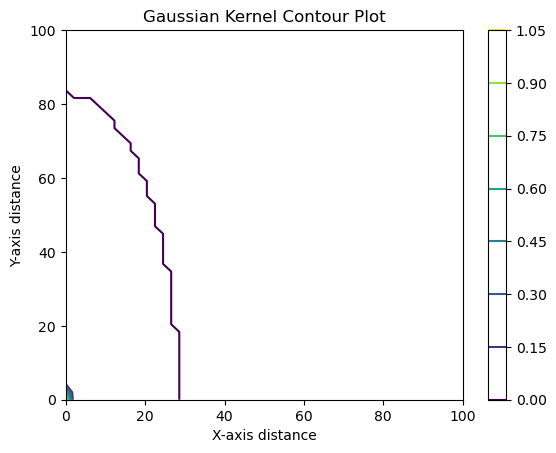

In [150]:
simulator = Mysimulator(x_min=0, y_min=0, x_max=100, y_max=100,
                        n=50, theta=3, range_val1=1, range_val2=3)
simulator.run_simulation()

Iostropic Gaussian kernel

range_1 = range_2 = 1.

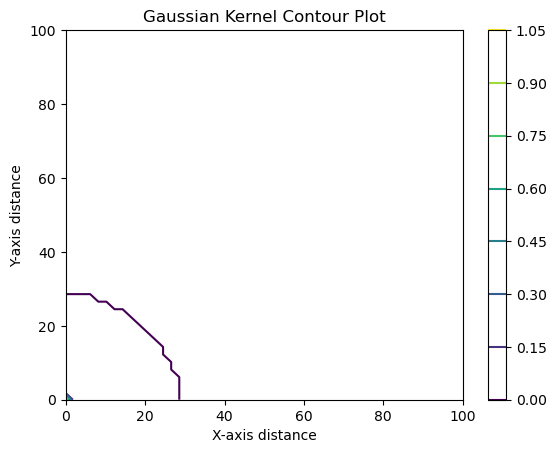

In [151]:
simulator = Mysimulator(x_min=0, y_min=0, x_max=100, y_max=100,
                        n=50, theta=3, range_val1=1, range_val2=1)
simulator.run_simulation()

### Exercise 2. 

Observe $\biggl| \sum_j v_{jk} e^{i \omega x_j} -e^{i \omega x_o}  \biggr|^2$ as $x_o$ varies. If $x_0$ is located at boundary or outside of the region, we are doing extrapolation, otherwise interpolation. 

It seems interpolation is more stable.

### coding

In [80]:

def my_sim1(x_min=0, x_max=100, n=500, theta=3, range_val=5, j=1, xknot_locs=[10,50],cov_index=1):

    # Specify the number of points along each axis
    num_points_x, num_points_y = n, n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x)
    x0 = np.linspace(x_min, x_max*2, num_points_x)
    
    d = np.sqrt( (x[:, None] - x)**2 )  

    # 
    cov_mat1 = theta * np.exp(-d/range_val)
    cov_mat2 = theta * (1 + d/range_val) * np.exp(-d/range_val)
    cov_mat3 = theta * np.exp( -(d/range_val)**2)
    
    eigen_val_1, eigenvec_1 = np.linalg.eig(cov_mat1)
    eigen_val_2, eigenvec_2 = np.linalg.eig(cov_mat2)
    eigen_val_3, eigenvec_3 = np.linalg.eig(cov_mat3)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]
    # eig_val_list = [eigen_val_1, eigen_val_2, eigen_val_3]
    eig_vec_list = [eigenvec_1, eigenvec_2, eigenvec_3]

    # Calculate pairwise distances
    d = np.sqrt((x[:, None]-x)**2)

    # Generate a range of frequencies (w values)
    w_values = np.linspace(0, 2 * np.pi, num=n)

    for xknot_loc in xknot_locs:
            # Calculate the squared absolute value of V exp(iwx)
            tmp = np.exp(1j * np.outer(x, w_values))  # 1j represents the imaginary unit (sqrt(-1)).
            out = np.abs(np.dot(eig_vec_list[cov_index].T, tmp) - np.exp(1j * w_values * x0[xknot_loc]))**2
            # Plot the result
            plt.plot(w_values, out[j - 1,], label=f'|V exp(iwx) - exp(iwx0)|^2 for x_0={xknot_loc}')

    plt.xlabel('w')
    plt.ylabel('|V exp(iwx) - exp(iwx0)|^2')
    plt.title(f'|V exp(iwx) - exp(iwx0)|^2 for different x₀ values')
    plt.legend()
    plt.ylim(0, 25)  # Set y-axis limits
    plt.show()


# 

Interpolation  
Set x_min=0, x_max=10, x_0 = 5, V is j_th eigen vector.

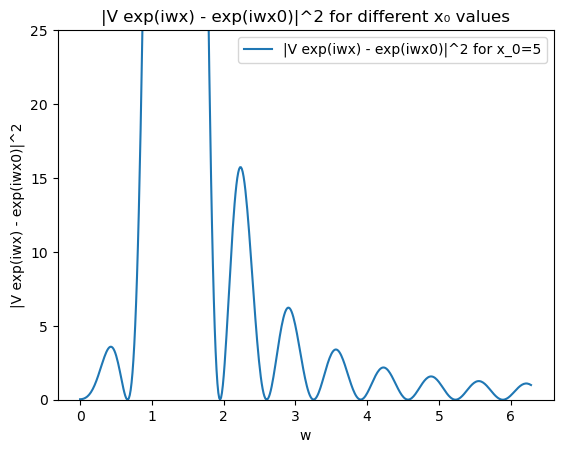

In [157]:
my_sim1(x_min=0, x_max=10,  n=500, theta=3, range_val=3, j=5, xknot_locs=[5], cov_index=0)

Extrapolation  
Set x_min=0, x_max=10, x_0 = 25, V is j_th eigen vector.

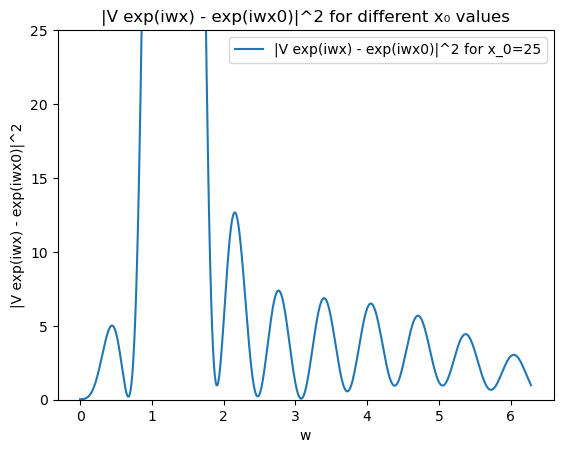

In [160]:
my_sim1(x_min=0, x_max=10,  n=500, theta=3, range_val=3, j=5, xknot_locs=[25], cov_index=0)

# 

## Exercise.3 

Observe $\biggl| \sum_j v_{jk} e^{i \omega x_j}  \biggr|^2$ by varying covariance functions. It is known that if spectral density f decrease more quickly, the corresponding covariance function is more smooth. 

In [161]:
def my_sim2(x_min=0, y_min=0, x_max=100, y_max=100, n=500, theta=3,
             range_val=5, j=1, cov_index=1):

    # Specify the number of points along each axis
    num_points_x, num_points_y = n, n

    # Generate a regular grid using linspace
    x = np.linspace(x_min, x_max, num_points_x)
    y = np.linspace(y_min, y_max, num_points_y)
    
    d = np.sqrt( (x[:, None] - x)**2 + (y[:, None] - y)**2 )  + 1e-8

    # 1) 
    cov_mat1 = theta * np.exp(-d/range_val)            # w^{-2}
    cov_mat2 = theta * (1 + d/range_val) * np.exp(-d/range_val) # w^{-4}
    cov_mat3 = theta * np.exp( -(d/range_val)**2)      # exp(w^-2)

    cov_list = [cov_mat1, cov_mat2, cov_mat3]

    eigen_val_1, eigenvec_1 = np.linalg.eig(cov_mat1)
    eigen_val_2, eigenvec_2 = np.linalg.eig(cov_mat2)
    eigen_val_3, eigenvec_3 = np.linalg.eig(cov_mat3)
    
    # cov_list = [cov_mat1, cov_mat2, cov_mat3]
    # eig_val_list = [eigen_val_1, eigen_val_2, eigen_val_3]
    eig_vec_list = [eigenvec_1, eigenvec_2, eigenvec_3]

    # Generate a range of frequencies (w values)
    w_values = np.linspace(0, 2 * np.pi, num=n)

    # Calculate the squared absolute value of V exp(iwx)
    tmp = np.exp(1j * np.outer(x, w_values))  # 1j represents the imaginary unit (sqrt(-1)).
    out = np.abs(np.dot(eig_vec_list[cov_index].T, tmp) )**2

    # Plot the result
    plt.plot(w_values, out[j-1,], label=f'|V exp(iwx) )|^2 for j={j}')
    plt.xlabel('w values')
    plt.ylabel('|V exp(iwx)|^2')
    plt.title(f'|V exp(iwx)|^2 for j={j}')
    plt.legend()
    plt.ylim(0, 25)  # Set y-axis limits
    plt.show()



# 

### exponential kernel (w^{-2}) 
k(d) = theta * exp(-d/range_val)  

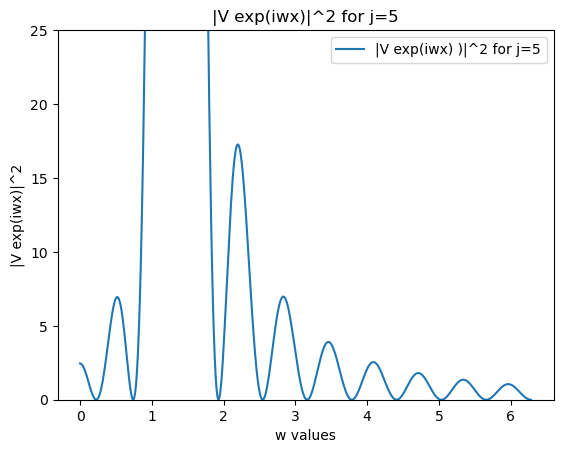

In [162]:
my_sim2(x_min=0, y_min=0, x_max=10, y_max=10, n=500, theta=3,
         range_val=3, j=5, cov_index=0)

### matern kernel (w^{-4})
k(d) = theta * exp(-d/range_val) * (1 + d/range_val)          

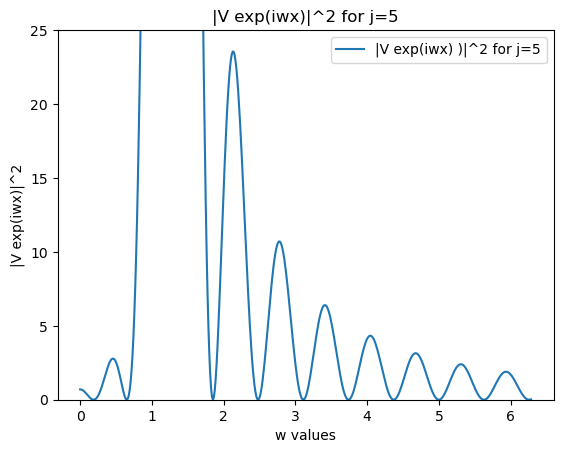

In [163]:
my_sim2(x_min=0, y_min=0, x_max=10, y_max=10, n=500, theta=3, 
        range_val=3, j=5, cov_index=1)

### gaussian kernel (exp(w^{-4})), 
k(d) = theta * exp(- d^2/range_val^2)   

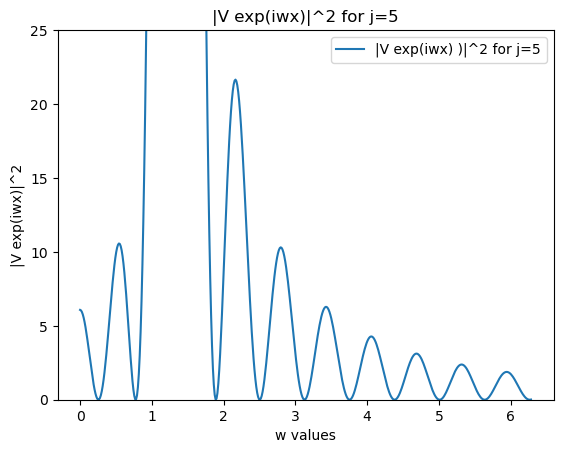

In [164]:
my_sim2(x_min=0, y_min=0, x_max=10, y_max=10, n=500, theta=3, 
        range_val=3, j=5, cov_index=2)